# About

In this notebook we show how to use inside IPython __ROOT__ (C++ library, de-facto standard in High Energy Physics).

This notebook is aimed to help __ROOT__ users.

Working using ROOT-way loops is very slow in python and in most cases useless.

You're proposed to use `root_numpy` - a very convenient python library to operate with ROOT (`root_numpy` is included in REP docker).

### Allowing inline plots

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Creating ROOT file using root_numpy

There are two libraries to work with ROOT files

* rootpy http://www.rootpy.org - direct wrapper to ROOT methods.
* root_numpy http://rootpy.github.io/root_numpy/ - new-style, efficient and simple library to deal with ROOT files from python

Let's show how to use the second library.

In [2]:
import numpy
import root_numpy
# generating random data
data = numpy.random.normal(size=[10000, 2])
# adding names of columns
data = data.view([('first', float), ('second', float)])
# saving to file
root_numpy.array2root(data, filename='./toy_datasets/random.root', treename='tree', mode='recreate')

In [3]:
!ls ./toy_datasets

MiniBooNE_PID.txt README.md         magic04.data      random.root


## Add column to the ROOT file using root_numpy

In [4]:
from rootpy.io import root_open
with root_open('./toy_datasets/random.root', mode='a') as myfile:
    new_column = numpy.array(numpy.ones([10000, 1]) , dtype=[('new', 'f8')])
    root_numpy.array2tree(new_column, tree=myfile.tree)
    myfile.write()

/Users/antares/.virtualenvs/rep/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [5]:
root_numpy.root2array('./toy_datasets/random.root', treename='tree')

array([(1.0499790875460244, -0.22133603992621217, 1.0),
       (0.9871171444480903, -0.34833252587788277, 1.0),
       (0.31660983000800413, 0.5797451309682367, 1.0), ...,
       (-1.0921299400627056, -1.2044487169596867, 1.0),
       (1.2491057712644054, 0.254818083880807, 1.0),
       (-1.0557835467213994, -0.8980678862278234, 1.0)], 
      dtype=[('first', '<f8'), ('second', '<f8'), ('new', '<f8')])

# Plot function using ROOT

pay attention that `canvas` is on the last line. This is an output value of cell.

When IPython cell return canvas, it is automatically drawn

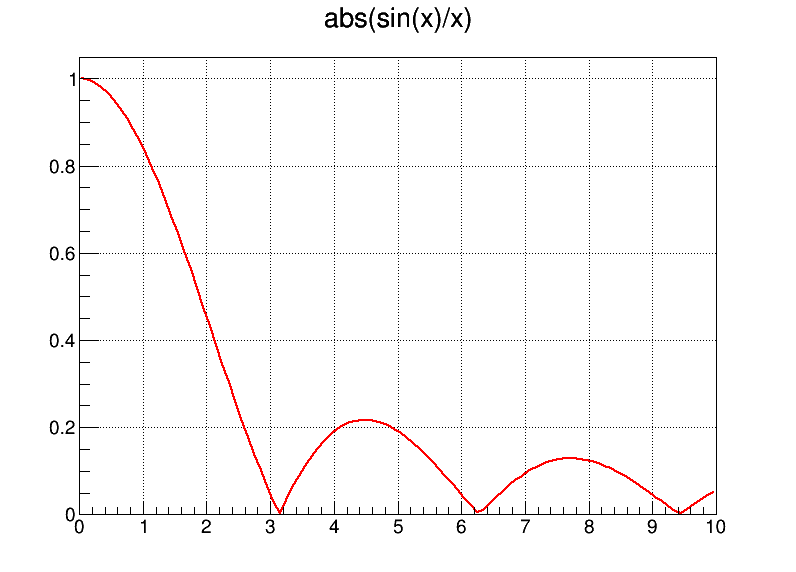

In [6]:
import ROOT
from rep.plotting import default_canvas
canvas = default_canvas()
fun1 = ROOT.TF1( 'fun1', 'abs(sin(x)/x)', 0, 10)
canvas.SetGridx()
canvas.SetGridy()
fun1.Draw()
# Drawing output (last line is considered as output of cell)
canvas

# Plot histogram using ROOT for branch in root file

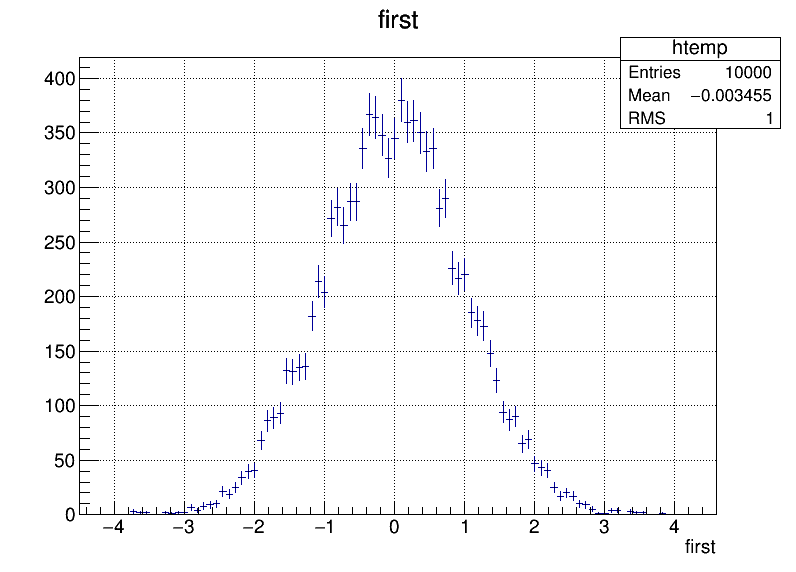

In [7]:
File = ROOT.TFile("toy_datasets/random.root")
Tree = File.Get("tree")
Tree.Draw("first")
canvas

## use histogram settings

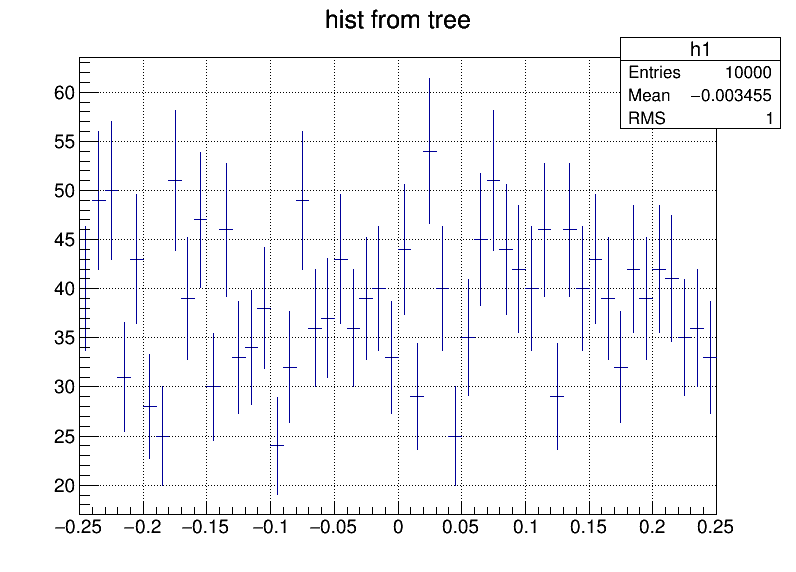

In [8]:
# we need to keep histogram in any variable, otherwise it will be deleted automatically
h1 = ROOT.TH1F("h1","hist from tree",50, -0.25, 0.25)
Tree.Draw("first>>h1")
canvas

# root_numpy + ipython way

But IPython provides it's own plotting / data manipulation techniques. Brief demostration below.

Pay attention that we written the columns which will be evaluated on-the-fly.

In [9]:
data = root_numpy.root2array("toy_datasets/random.root", 
                             treename='tree', 
                             branches=['first', 'second', 'sin(first) * exp(second)'], 
                             selection='first > 0')

__in example above__ we selected three branches (one of which is an expression and will be computed on-the-fly) and selections

In [10]:
# taking, i.e. first 10 elements:
data2 = data[:10]

### convert to pandas

In [11]:
import pandas
dataframe = pandas.DataFrame(data)
# looking ar first elements
dataframe.head()

,first,second,sin(first) * exp(second)
0,1.049979,-0.221336,0.695186
1,0.987117,-0.348333,0.589002
2,0.316610,0.579745,0.555935
3,1.316638,0.053059,1.020617
4,1.741003,0.009653,0.995109


In [12]:
# taking eleents, that satisfy some condition
dataframe[dataframe['second'] > 0].head()

,first,second,sin(first) * exp(second)
2,0.316610,0.579745,0.555935
3,1.316638,0.053059,1.020617
4,1.741003,0.009653,0.995109
5,0.972303,1.488582,3.660670
6,2.068687,0.249502,1.127572


In [13]:
# adding new column
dataframe['third'] = dataframe['first'] +  dataframe['second'] 
dataframe.head()

,first,second,sin(first) * exp(second),third
0,1.049979,-0.221336,0.695186,0.828643
1,0.987117,-0.348333,0.589002,0.638785
2,0.316610,0.579745,0.555935,0.896355
3,1.316638,0.053059,1.020617,1.369697
4,1.741003,0.009653,0.995109,1.750656


## Histograms in python

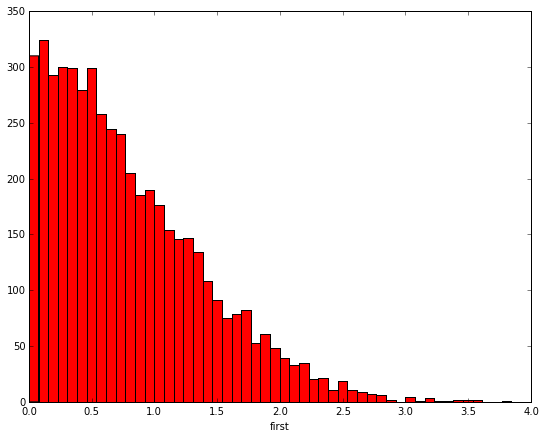

In [14]:
figure(figsize=(9, 7))
hist(data['first'], bins=50)
xlabel('first')

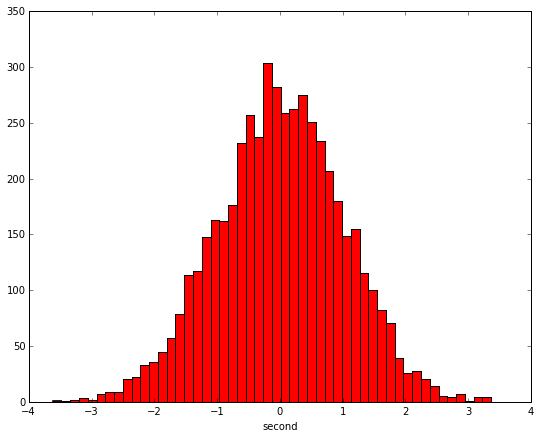

In [15]:
figure(figsize=(9, 7))
hist(data['second'], bins=50)
xlabel('second')